# Ejercicio 4

El objetivo de este ejercicio es que el estudiante se familiarice con la funcionalidad de los auto-encoders. Los auto-encoders han ganado mucho espacio en la ciencia en los últimos años por sus capacidades para reducir dimensiones y también para eliminar ruido en los datasets.

## Ejercicio 4.1 

Ejecute y analice el siguiente código

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.regularizers import l1
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
def plot_autoencoder_outputs(autoencoder, n, dims):
    """Muestra imagenes originales en la primera fila, e imagenes codificadas en la segunda
    """
    
    # se decodifican imagenes de prueba
    decoded_imgs = autoencoder.predict(x_test)

    # number of example digits to show
    n = 5
    plt.figure(figsize=(10, 4.5))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == 2:
            ax.set_title('Imagenes Originales')

        # plot reconstruction 
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == 2:
            ax.set_title('Imagenes Reconstruidas')
    #lt.savefig("Corre.jpg")
    plt.show()
    

In [3]:
# se lee el dataset mnist con imagenes que contiene dígitos trazados a mano
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# se formatean los datos de prueba y entrenamiento
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [4]:
# arquitectura del encoder
input_size = 784
hidden_size = 128 #Original 128
code_size = 32  # dimensionalidad final 32 original

# se crea la estructura de encoder
input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

# se instancia el encoder y se lo entrena con los datos de entrenamiento
autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# Valor anterior de epochs es 3
autoencoder.fit(x_train, x_train, epochs=3)  # puede cambiar el valor de epochs para ver resultados distintos

Epoch 1/3
60000/60000 [==============================] - 8s 134us/step - loss: 0.1349
Epoch 2/3
60000/60000 [==============================] - 8s 134us/step - loss: 0.0963
Epoch 3/3
60000/60000 [==============================] - 8s 135us/step - loss: 0.0908


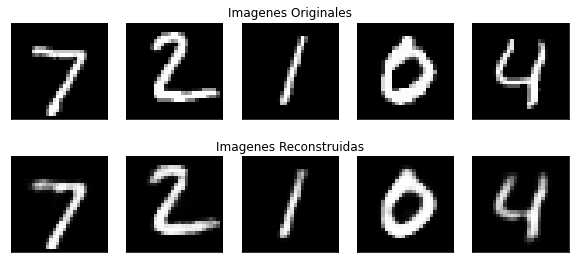

In [5]:
plot_autoencoder_outputs(autoencoder, 5, (28, 28))

## Ejercicio 4.2

Cree una arquitectura para el encoder-decoder más simple: El input size se mantiene, pero reduzca los valores de `hidden_size`y `code_size` hasta encontrar una combinación de valores mínimos de ambos valores que haga que las imagenes reconstruidas mantenga su calidad (la calidad implica que un humano pueda reconocer las imagenes reconstruidas) 

¿Que combinaciónd de parámetros: `hidden_size`y `code_size` logra minimizar la dimensionalidad de las imágenes y al mismo tiempo manteniendo un nivel aceptable de calidad de imagen? Muestre las imagenes resultantes

## Ejercicio 4.3

El siguiente código modifica las imagenes de entrada para que tengan ruido. Ejecute y analice el código a continuación.

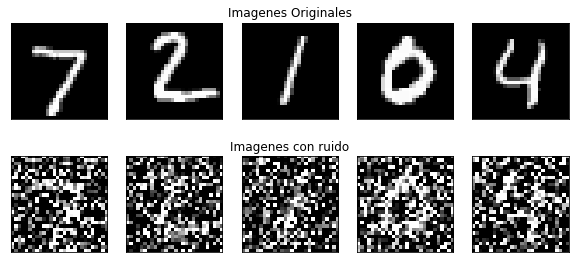

In [6]:
# ahora se agrega ruido a las imagenes para probar la funcionalidad de denoising
noise_factor = 0.80
x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

# se muestran las imágenes originales y con ruido
n = 5
plt.figure(figsize=(10, 4.5))
for i in range(n):
    # plot original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == int(n/2):
        ax.set_title('Imagenes Originales')

    # plot noisy image 
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == int(n/2):
        ax.set_title('Imagenes con ruido')

## Ejercicio 4.4

Entrene un auto-encoder (puede ser el mismo que se usó en el ejercicio 4.1). Este auto-encoder se entrenará con las imagenes con ruido: `autoencoder.fit(x_train_noisy, x_train, epochs=10)`. Finalmente, muestre un plot de 3 filas donde se tengan las imagenes originales, las imagenes con ruido, y las imagenes generadas por el auto-encoder

In [7]:
# arquitectura del encoder
input_size = 784
hidden_size = 128 #Original 128
code_size = 32  # dimensionalidad final 32 original

# se crea la estructura de encoder
input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

# se instancia el encoder y se lo entrena con los datos de entrenamiento
autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# Valor anterior de epochs es 3
autoencoder.fit(x_train_noisy, x_train_noisy, epochs=10)  # puede cambiar el valor de epochs para ver resultados distintos

Epoch 1/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.6144
Epoch 2/10
60000/60000 [==============================] - 8s 139us/step - loss: 0.6081
Epoch 3/10
60000/60000 [==============================] - 8s 139us/step - loss: 0.6067
Epoch 4/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.6062
Epoch 5/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.6059
Epoch 6/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.6056
Epoch 7/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.6053
Epoch 8/10
60000/60000 [==============================] - 9s 145us/step - loss: 0.6051
Epoch 9/10
60000/60000 [==============================] - 8s 139us/step - loss: 0.6050
Epoch 10/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.6048


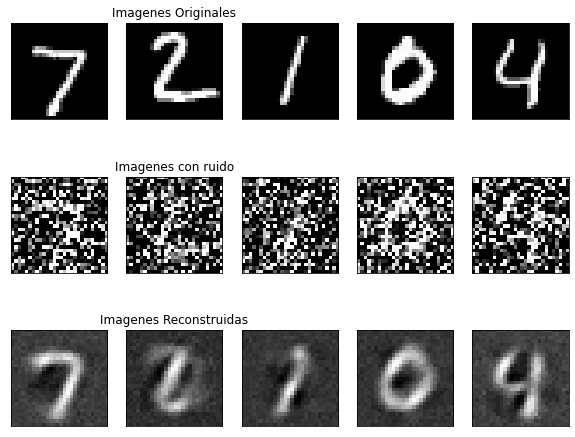

In [8]:
#Modelo
decoded_imgs = autoencoder.predict(x_test_noisy)

# se muestran las imágenes originales y con ruido
n = 5
plt.figure(figsize=(10, 8))
for i in range(n):
    # plot original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == int(n/3):
        ax.set_title('Imagenes Originales')

    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == int(n/3):
        ax.set_title('Imagenes con ruido')
        
        
    # plot noisy image 
    ax = plt.subplot(3, n, i + 6 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == int(n/3):
        ax.set_title('Imagenes Reconstruidas')

## Ejercicio 4.5 

¿Cuál es el valor máximo del parámetro `noise_factor` que haga que todavía se encuentren resultados satisfactorios del auto-encoder entrenado en el ejercicio anterior?

Muestre en una imagen los resultados